In [1]:
import os
from PIL import Image
import numpy as np
from numpy import asarray
import mahotas
import cv2
import shutil
import matplotlib.pyplot as plt

In [2]:
# constants

# 1
P = 256

# 4
K = 5

In [3]:
# functions
def remove(path):
    if os.path.exists(path):  
        if os.path.isfile(path) or os.path.islink(path):
            os.unlink(path)
        else:
            shutil.rmtree(path)

def haralick_matrix(img_array, d=1, alpha=0):
    n1 = img_array.shape[0]
    n2 = img_array.shape[1]

    haralick = np.zeros((P, P))
    if alpha == 0:
        for i in range(n1):
            for j in range(n2):
                if i + d < n1:
                    haralick[img_array[i+d, j], img_array[i, j]] += 1
                if i - d >= 0:
                    haralick[img_array[i-d, j], img_array[i, j]] += 1
                if j + d < n2:
                    haralick[img_array[i, j+d], img_array[i, j]] += 1
                if j - d >= 0:
                    haralick[img_array[i, j-d], img_array[i, j]] += 1
    elif alpha == 90:
        for i in range(n1):
            for j in range(n2):
                if (i + d < n1) and (j + d < n2):
                    haralick[img_array[i+d, j+d], img_array[i, j]] += 1
                if (i - d >= 0) and (j + d < n2):
                    haralick[img_array[i-d, j+d], img_array[i, j]] += 1
                if (i + d < n1) and (j - d >= 0):
                    haralick[img_array[i+d, j-d], img_array[i, j]] += 1
                if (i - d >= 0) and (j - d >= 0):
                    haralick[img_array[i-d, j-d], img_array[i, j]] += 1
    else:
        raise ValueError("Alpha must be in set {0, 90}")
    return haralick.astype(np.uint8)

def contrast_haralick_func(hm):
    haralick_contrast = 0
    for i in range(P):
        for j in range(P):
            haralick_contrast += np.abs(i - j) * hm[i, j]
    haralick_contrast /= P ** 2
    return haralick_contrast

In [4]:
for i in range(1, 6):
    remove(f"files/{i}")
for i in range(1, 6):
    os.mkdir(f"files/{i}")


img = Image.open("files/image.jpg")

### 1. Загрузка и визуализация изображения
#### a) Числовые характеристики изображения

In [5]:
print(f"Размерность изображения: {img.size[0]}x{img.size[1]}")
print(f"Число световых каналов: {len(img.getbands())}")
print(f"Яркостное разрешение: {len(img.getbands()) * 8} bits")


Размерность изображения: 1600x1060
Число световых каналов: 3
Яркостное разрешение: 24 bits


#### б) Если изображение содержит много цветовых каналов, то привести его к одноканальному (в градациях серого) в диапазоне [0; P], P = 255 (яркостное разрешение – 1 байт) 

In [6]:
gray = img.convert('L')
gray.save('files/greyscale.jpg')

img_array = asarray(gray)

#### в) Статистические характеристики изображения

In [7]:
print(f"Динамический диапазон яркостей: [{img_array.min()}, {img_array.max()}]")
print(f"% использования яркостного диапазона: {len(np.unique(img_array))/256 * 100}%")
print(f"Число различных яркостей: {len(np.unique(img_array))}")

Динамический диапазон яркостей: [0, 255]
% использования яркостного диапазона: 100.0%
Число различных яркостей: 256


#### г) Рассчитать статистические характеристики изображения и заполнить таблицу.
источник: https://www.geeksforgeeks.org/mahotas-haralick-features/

источник: https://sv-journal.org/2016-3/04/ru/index.php?lang=ru#:~:text=%D0%9E%D0%B4%D0%BD%D0%B8%D0%BC%20%D0%B8%D0%B7%20%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D0%BD%D1%8B%D1%85%20%D1%81%D0%BF%D0%BE%D1%81%D0%BE%D0%B1%D0%BE%D0%B2%20%D0%BE%D0%BF%D0%B8%D1%81%D0%B0%D0%BD%D0%B8%D1%8F,%D1%8F%D1%80%D0%BA%D0%BE%D1%81%D1%82%D0%B5%D0%B9%20%D0%BE%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D0%BE%D0%B9%20%D0%BA%D0%BE%D0%BD%D1%84%D0%B8%D0%B3%D1%83%D1%80%D0%B0%D1%86%D0%B8%D0%B8%20%5B8%5D.

In [8]:
print(f"Динамический диапазон яркостей: [{img_array.min()}, {img_array.max()}]")
print(f"% использования яркостного диапазона: {len(np.unique(img_array))/256 * 100}%")
print(f"Число различных яркостей: {len(np.unique(img_array))}")
print(f"Средняя яркость: {np.mean(img_array)}")
print(f"Дисперсия яркости: {np.std(img_array) ** 2}")
print(f"Контраст Михельсона: {(img_array.max() - img_array.min()) / (img_array.max() + img_array.min())}")
print(f"Глобальный контраст: {(img_array.max() - img_array.min()) / (P - 1)}")
print(f"Среднеквадратический контраст: {np.std(img_array)}")

hm = haralick_matrix(img_array)
Image.fromarray(hm)
haralick_contrast = 0
for i in range(P):
    for j in range(P):
        haralick_contrast += np.abs(i - j) * hm[i, j]
haralick_contrast /= P ** 2

print(f"Контраст Харалика: {haralick_contrast}")

Динамический диапазон яркостей: [0, 255]
% использования яркостного диапазона: 100.0%
Число различных яркостей: 256
Средняя яркость: 130.7750654481132
Дисперсия яркости: 3696.3542965464226
Контраст Михельсона: 1.0
Глобальный контраст: 1.0
Среднеквадратический контраст: 60.797650419620844
Контраст Харалика: 648.7682800292969


#### д) Рассчитать и визуализировать матрицу Харалика для различных параметров d и alpha:

Матрица Харалика с параметрами: d = 1, alpha = 0


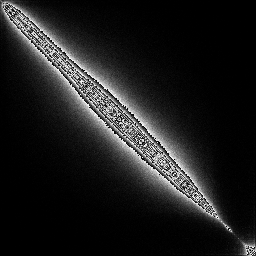

In [9]:
print("Матрица Харалика с параметрами: d = 1, alpha = 0")
mh = Image.fromarray(haralick_matrix(img_array, d=1, alpha=0))
mh.save('files/1/contrast_haralick_d=1_alpha=0.jpg')
mh.show()


Матрица Харалика с параметрами: d = 1, alpha = 90


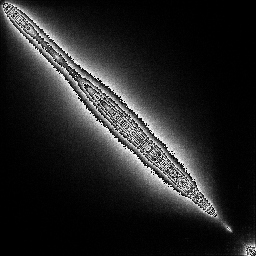

In [10]:
print("Матрица Харалика с параметрами: d = 1, alpha = 90")
mh = Image.fromarray(haralick_matrix(img_array, d=1, alpha=90))
mh.save('files/1/contrast_haralick_d=1_alpha=90.jpg')
mh.show()


Матрица Харалика с параметрами: d = 10, alpha = 0


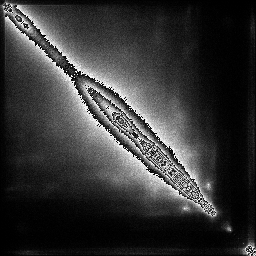

In [11]:
print("Матрица Харалика с параметрами: d = 10, alpha = 0")
mh = Image.fromarray(haralick_matrix(img_array, d=10, alpha=0))
mh.save('files/1/contrast_haralick_d=10_alpha=0.jpg')
mh.show()


Матрица Харалика с параметрами: d = 10, alpha = 90


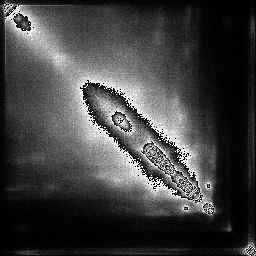

In [12]:
print("Матрица Харалика с параметрами: d = 10, alpha = 90")
mh = Image.fromarray(haralick_matrix(img_array, d=10, alpha=90))
mh.save('files/1/contrast_haralick_d=10_alpha=90.jpg')
mh.show()


### 2. Контрастирование в яркостных окнах

#### a) Масштабирование динамического диапазона на интервал [0; 255]

In [13]:
def set_contrast(img_array, low:int, high:int):
    mmin = img_array.min()
    mmax = img_array.max()

    new_img_array = np.where(img_array < low, np.zeros(img_array.shape), img_array)
    new_img_array = np.where(img_array > P-1, np.full(img_array.shape, P-1), img_array)
    new_img_array = np.where((low <= img_array) & (img_array <= P-1), (img_array - mmin) / (mmax - mmin) * (high - low) + low, img_array)

    return new_img_array.astype(np.uint8)


In [14]:
img_array = set_contrast(img_array, 0, 255)
Image.fromarray(img_array).save('files/2/contrast_0_255.jpg')

#### б) Провести отображение указанных яркостных диапазонов на максимально возможный диапазон яркостей

In [15]:
# [0, 120]

new_img_array = set_contrast(img_array, 0, 120)
Image.fromarray(new_img_array).save('files/2/contrast_0_120.jpg')

In [16]:
# [50, 120]

new_img_array = set_contrast(img_array, 50, 120)
Image.fromarray(new_img_array).save('files/2/contrast_50_120.jpg')

In [17]:
# [120, 200]

new_img_array = set_contrast(img_array, 120, 200)
Image.fromarray(new_img_array).save('files/2/contrast_120_200.jpg')

In [18]:
# [120, 255]

new_img_array = set_contrast(img_array, 120, 255)
Image.fromarray(new_img_array).save('files/2/contrast_120_255.jpg')

### 3. Гамма-коррекция изображения

In [19]:
def gamma_correction(img_array: np.array, gamma: float) -> np.array:
    mmin = img_array.min()
    mmax = img_array.max()

    new_img_array = np.power((img_array - mmin) / (mmax - mmin), gamma) * (P - 1)
    return new_img_array.astype(np.uint8)

In [20]:
# gamma = 0.2

new_img_array = gamma_correction(img_array, 0.2)
Image.fromarray(new_img_array).save('files/3/gamma_0p2.jpg')

In [21]:
# gamma = 0.5

new_img_array = gamma_correction(img_array, 0.5)
Image.fromarray(new_img_array).save('files/3/gamma_0p5.jpg')

In [22]:
# gamma = 2

new_img_array = gamma_correction(img_array, 2)
Image.fromarray(new_img_array).save('files/3/gamma_2.jpg')

In [23]:
# gamma = 5

new_img_array = gamma_correction(img_array, 5)
Image.fromarray(new_img_array).save('files/3/gamma_5.jpg')

### 4. Выравнивание гистограмм

#### а) Построить гистограммы яркостей и накопленных яркостей исходного изображения

In [24]:
unique, indexes, counts = np.unique(img_array, return_inverse=True, return_counts=True)
norm_counts = counts / np.sum(counts)

stacked_counts = np.cumsum(norm_counts)

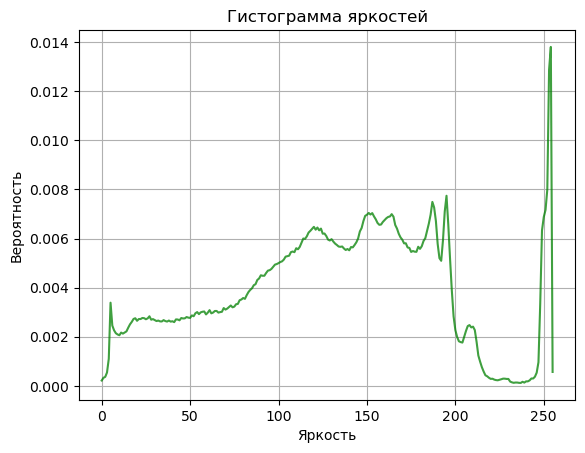

In [25]:
plt.plot(unique, norm_counts, color='g', alpha=0.75)

plt.xlabel('Яркость')
plt.ylabel('Вероятность')
plt.title('Гистограмма яркостей')
plt.grid(True)
plt.savefig("files/4/norm.jpg")
plt.show()

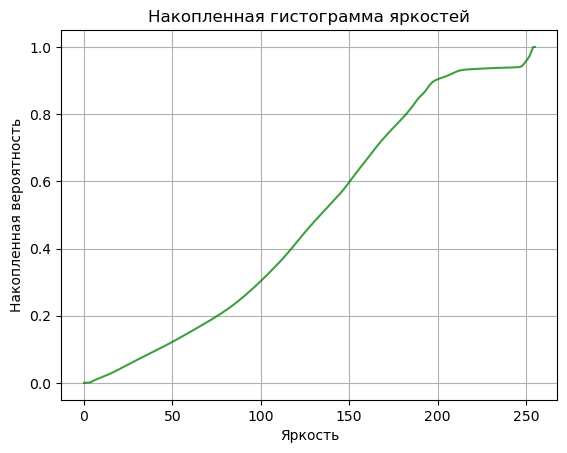

In [26]:
plt.plot(unique, stacked_counts, color='g', alpha=0.75)

plt.xlabel('Яркость')
plt.ylabel('Накопленная вероятность')
plt.title('Накопленная гистограмма яркостей')
plt.grid(True)
plt.savefig("files/4/stacked.jpg")
plt.show()

#### б) Провести выравнивание гистограмм по различным распределениям
Источник: https://en.wikipedia.org/wiki/Histogram_matching, https://stackoverflow.com/questions/32655686/histogram-matching-of-two-images-in-python-2-x

In [27]:
def histogram_matching(source: np.array, 
                       target_distribution: np.array) -> (np.array, np.array):
    source_unique, source_indexes, source_counts = np.unique(source, return_inverse=True, return_counts=True)
    source_norm_counts = source_counts / np.sum(source_counts)
    source_stacked_counts = np.cumsum(source_norm_counts)

    target_norm_counts = target_distribution / np.sum(target_distribution)
    target_stacked_counts = np.cumsum(target_norm_counts)

    interp_values = np.interp(source_stacked_counts, target_stacked_counts, source_unique)
    return (interp_values[source_indexes].reshape(source.shape).astype(np.uint8),
           target_stacked_counts)
    

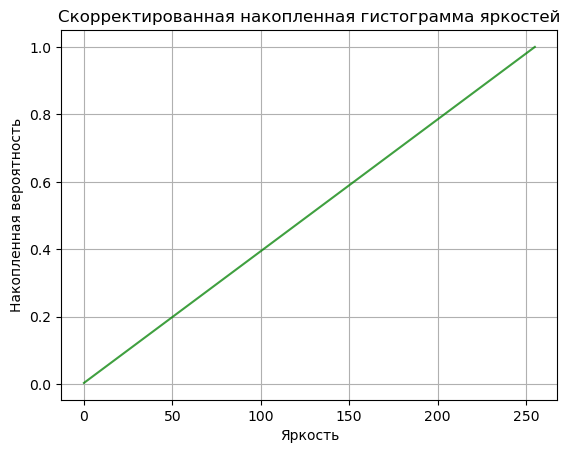

In [28]:
f_uniform = np.full((P,), K)

after_correct_image, after_correct_dist = histogram_matching(img_array, f_uniform)
Image.fromarray(after_correct_image).save('files/4/corrected_image_uniform.jpg')

plt.plot(range(len(after_correct_dist)), after_correct_dist, color='g', alpha=0.75)

plt.xlabel('Яркость')
plt.ylabel('Накопленная вероятность')
plt.title('Скорректированная накопленная гистограмма яркостей')
plt.grid(True)
plt.savefig("files/4/corrected_dist_uniform.jpg")
plt.show()

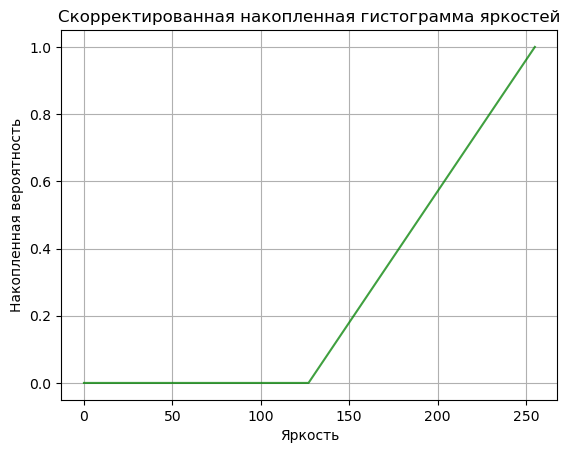

In [29]:
f_triangle = np.zeros((P,))
f_triangle[0: P//2] = K * f_triangle[0: P//2]
f_triangle[P//2: P] = K * (255 - f_triangle[P//2: P])

after_correct_image, after_correct_dist = histogram_matching(img_array, f_triangle)
Image.fromarray(after_correct_image).save('files/4/corrected_image_triangle.jpg')

plt.plot(range(len(after_correct_dist)), after_correct_dist, color='g', alpha=0.75)

plt.xlabel('Яркость')
plt.ylabel('Накопленная вероятность')
plt.title('Скорректированная накопленная гистограмма яркостей')
plt.grid(True)
plt.savefig("files/4/corrected_dist_triangle.jpg")
plt.show()

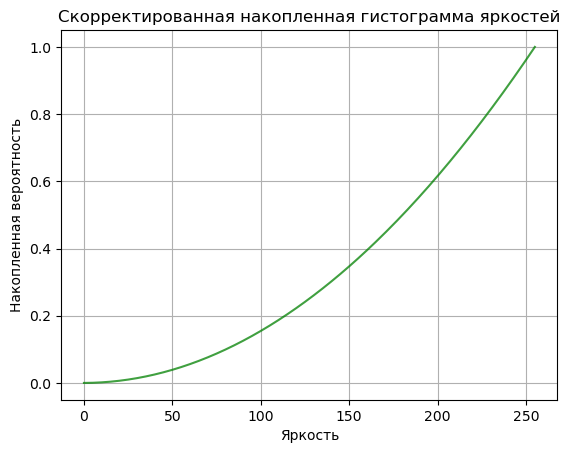

In [30]:
f_right_triangle = K * np.arange(P)

after_correct_image, after_correct_dist = histogram_matching(img_array, f_right_triangle)
Image.fromarray(after_correct_image).save('files/4/corrected_image_right_triangle.jpg')

plt.plot(range(len(after_correct_dist)), after_correct_dist, color='g', alpha=0.75)

plt.xlabel('Яркость')
plt.ylabel('Накопленная вероятность')
plt.title('Скорректированная накопленная гистограмма яркостей')
plt.grid(True)
plt.savefig("files/4/corrected_dist_right_triangle.jpg")
plt.show()

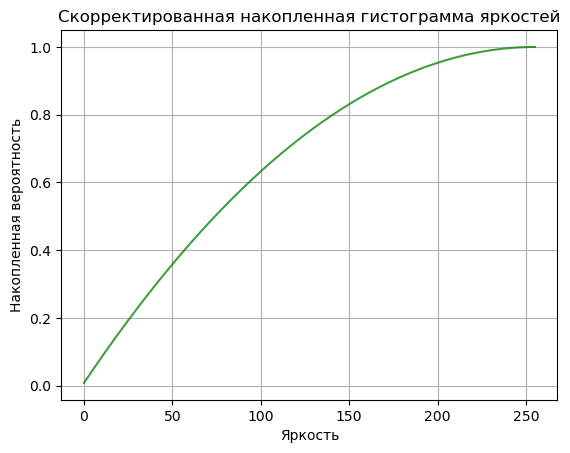

In [31]:
f_left_triangle = K * (P - np.arange(P))

after_correct_image, after_correct_dist = histogram_matching(img_array, f_left_triangle)
Image.fromarray(after_correct_image).save('files/4/corrected_image_left_triangle.jpg')

plt.plot(range(len(after_correct_dist)), after_correct_dist, color='g', alpha=0.75)

plt.xlabel('Яркость')
plt.ylabel('Накопленная вероятность')
plt.title('Скорректированная накопленная гистограмма яркостей')
plt.grid(True)
plt.savefig("files/4/corrected_dist_left_triangle.jpg")
plt.show()

#### в) Провести адаптивное выравнивание гистограммы (AHE) без отсечения контраста для различных размеров черепичного разбиения изображения
Источник: https://github.com/prat1kbhujbal/Histogram_Equalization/blob/main/code/histogram_eq.py

In [32]:
def hist_equalization(mini_img, clahe_param=None):
    
    bin_cont = np.bincount(mini_img.flatten(), minlength=256)
    pixels = np.sum(bin_cont)
    bin_cont = bin_cont / pixels
    if clahe_param:
        bin_cont = np.where(bin_cont > clahe_param, np.full(clahe_param, bin_cont.shape), bin_cont)
    bin_cont = bin_cont / np.sum(bin_cont)
    cumulative_sumhist = np.cumsum(bin_cont)
    map = np.floor(255 * cumulative_sumhist).astype(np.uint8)
    arr_list = list(mini_img.flatten())
    eq_arr = [map[p] for p in arr_list]
    arr_back = np.reshape(np.asarray(eq_arr), mini_img.shape)
    return arr_back

def AHE(img_array: np.array, sq_size:int, clahe_param=None):
    img_eq = np.empty((img_array.shape[0], img_array.shape[1]), dtype=np.uint8)
    for i in range(0, img_array.shape[1], sq_size):
        for j in range(0, img_array.shape[0], sq_size):
            t = img_array[j:j + sq_size, i:i + sq_size]
            c = hist_equalization(t)
            img_eq[j:j + sq_size, i:i + sq_size] = c

    new_img_array = bilinear_interpolation(img_eq, img_eq.shape).astype(np.uint8)
    return new_img_array

def bilinear_interpolation(image, dimension):

    height = image.shape[0]
    width = image.shape[1]

    scale_x = (width)/(dimension[1])
    scale_y = (height)/(dimension[0])

    new_image = np.zeros((dimension[0], dimension[1]))

    for i in range(dimension[0]):
        for j in range(dimension[1]):
            x = (j+0.5) * (scale_x) - 0.5
            y = (i+0.5) * (scale_y) - 0.5

            x_int = int(x)
            y_int = int(y)

            # Prevent crossing
            x_int = min(x_int, width-2)
            y_int = min(y_int, height-2)

            x_diff = x - x_int
            y_diff = y - y_int

            a = image[y_int, x_int]
            b = image[y_int, x_int+1]
            c = image[y_int+1, x_int]
            d = image[y_int+1, x_int+1]

            pixel = a*(1-x_diff)*(1-y_diff) + b*(x_diff) * \
                    (1-y_diff) + c*(1-x_diff) * (y_diff) + d*x_diff*y_diff

            new_image[i, j] = pixel.astype(np.uint8)

    return new_image

In [33]:
for sq_size in [4, 8, 16, 32]:
    Image.fromarray(AHE(img_array, sq_size=8, clahe_param=None)).save(f'files/4/AHE-{sq_size}.jpg')

#### г) Провести адаптивное выравнивание гистограммы (CLAHE) с различными уровнями отсечения контраста. Размер черепичного разбиения выбрать 8 на 8

In [34]:
for cl in [0.001, 0.01, 0.1, 1]:
    Image.fromarray(AHE(img_array, 8, cl)).save(f'files/4/CLAHE-{cl}.jpg')

KeyboardInterrupt: 

#### д) Рассчитать матрицу и контраст Харалика выровненного изображения, сравнить с матрицей Харалика исходного изображения (d = 1)

<Figure size 640x480 with 0 Axes>

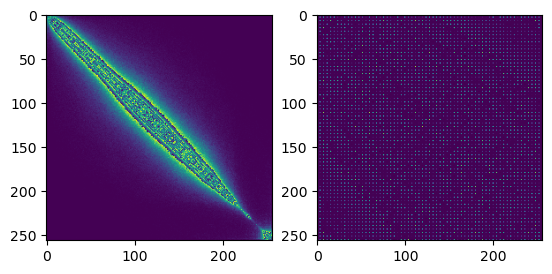

In [ ]:
plt.figure()

f, axes = plt.subplots(1, 2)

axes[0].imshow(Image.fromarray(haralick_matrix(img_array, d=1, alpha=0)))

aligned_img_array = AHE(img_array, sq_size=8, clahe_param=None)
mh = Image.fromarray(haralick_matrix(aligned_img_array, d=1, alpha=0))
mh.save('files/4/aligned_haralick_matrix_8.jpg')
axes[1].imshow(mh)
plt.show()

In [ ]:
print(f"Constast Haralick for aligned with 8 = {contrast_haralick_func(hm)}")

Constast Haralick for aligned with 8 = 648.7682800292969


<Figure size 640x480 with 0 Axes>

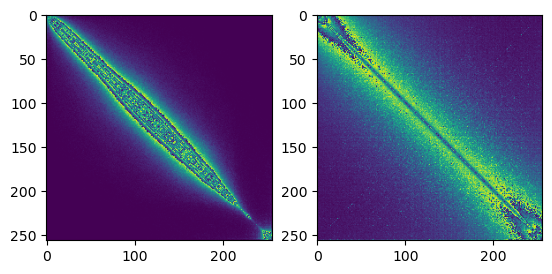

In [ ]:
plt.figure()

f, axes = plt.subplots(1, 2)

axes[0].imshow(Image.fromarray(haralick_matrix(img_array, d=1, alpha=0)))

aligned_img_array = AHE(img_array, sq_size=16, clahe_param=None)
mh = Image.fromarray(haralick_matrix(aligned_img_array, d=1, alpha=0))
mh.save('files/4/aligned_haralick_matrix_16.jpg')
axes[1].imshow(mh)
plt.show()

In [ ]:
print(f"Constast Haralick for aligned with 16 = {contrast_haralick_func(hm)}")

Constast Haralick for aligned with 16 = 648.7682800292969


### 5. Поканальное выравнивание гистограмм (для цветных изображений) 

#### а) Провести адаптивное выравнивание гистограммы (CLAHE) с различными уровнями отсечения контраста для каждого канала (RGB). Размер черепичного разбиения выбрать 8x8

In [ ]:
rgb_img_array = np.asarray(img)

aligned_rgb_img_array = np.empty(rgb_img_array.shape, dtype=np.uint8)

for cl in [0.001, 0.01, 0.1, 1]:
    aligned_rgb_img_array[:, :, 0] = AHE(rgb_img_array[:, :, 0], 8, cl)
    aligned_rgb_img_array[:, :, 1] = AHE(rgb_img_array[:, :, 1], 8, cl)
    aligned_rgb_img_array[:, :, 2] = AHE(rgb_img_array[:, :, 2], 8, cl)

    Image.fromarray(aligned_rgb_img_array).save(f'files/5/CLAHE-{cl}-rgb.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'files/5/CLAHE-0.001-rgb.jpg'

In [ ]:
aligned_rgb_img_array[:, :, 0]

array([[191., 191., 191., ..., 175., 175., 127.],
       [191., 191., 191., ..., 155., 191., 183.],
       [ 95.,  95.,  95., ..., 163., 191., 183.],
       ...,
       [255., 223., 231., ..., 127., 127., 191.],
       [159., 119., 199., ..., 127., 127., 191.],
       [ 47.,  31.,  95., ..., 127., 127., 191.]])